In [2]:
print('hello world')

hello world


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('fake_data.csv')
print(df)

     Hex_ID Barangay_name         PCSG  Population_density*  Latitude  \
0       267  Batong Buhay  PH175109001             15151504       NaN   
1       268  Batong Buhay  PH175109001               124322       NaN   
2       303  Batong Buhay  PH175109001                15654       NaN   
3       304  Batong Buhay  PH175109001                   10       NaN   
4       305  Batong Buhay  PH175109001              1455896       NaN   
..      ...           ...          ...                  ...       ...   
144     487        Burgos  PH175109003                 2094       NaN   
145     488        Burgos  PH175109003                13180       NaN   
146     521        Burgos  PH175109003                27627       NaN   
147     522        Burgos  PH175109003                19946       NaN   
148     523        Burgos  PH175109003                12161       NaN   

     Longitude  Buildability  RHU_in_area  
0          NaN           NaN            0  
1          NaN           NaN       

## Get columns

In [10]:
pop_den = df.loc[:,"Population_density*"]
pop_den

0      15151504
1        124322
2         15654
3            10
4       1455896
         ...   
144        2094
145       13180
146       27627
147       19946
148       12161
Name: Population_density*, Length: 149, dtype: int64

In [11]:
rhu_in_area = df.loc[:, "RHU_in_area"]
rhu_in_area

0      0
1      0
2      1
3      0
4      0
      ..
144    1
145    1
146    0
147    0
148    0
Name: RHU_in_area, Length: 149, dtype: int64

## HCI Formula

In [ ]:
HCI = total_ai - (total_ai)*(yi)

In [24]:
# creating a list of dataframe columns
pop_den_list = list(pop_den)

i = 0
for i in pop_den_list:
    # printing a third element of column
    print(i)

15151504
124322
15654
10
1455896
45657
15914
21062
11627
20856
2864
5171
7549
15909
2395
10546
13640
7066
8394
27883
21497
24182
17022
29982
472
22871
2045
26134
25694
1763
11309
16929
29304
10705
19764
15410
1710
16642
6919
11086
15227
6177
22624
4797
6361
22068
14453
14911
5387
5076
2797
28703
12668
12681
16092
7091
444
2249
28273
6180
6447
28191
3749
15248
21887
20588
11746
27970
20861
6615
11922
11729
21267
15880
16606
28888
8727
6545
1929
3859
14900
748
457
660
29877
5456
1697
7524
25095
18441
4100
17840
8394
18528
12792
20444
16465
24700
1406
16906
2004
29997
13869
29008
23365
13451
13008
26178
13460
16505
7211
38
12029
9570
14241
21649
1189
19453
2558
26351
18446
9447
15265
1361
4030
20852
19879
22482
530
17615
8798
8444
2367
14651
20293
24435
20657
5161
28383
20428
15438
13052
11797
24837
2094
13180
27627
19946
12161


In [25]:
# creating a list of dataframe columns
rhu_in_area_list = list(rhu_in_area)

for i in rhu_in_area_list:
    # printing a third element of column
    print(i)

0
0
1
0
0
1
0
0
1
0
0
1
1
1
1
1
0
0
0
0
1
0
0
1
1
1
0
0
1
0
0
1
0
1
0
0
0
0
1
1
1
0
1
0
0
1
1
1
0
1
1
0
0
0
0
1
0
1
0
1
0
1
1
0
1
0
0
0
0
1
1
0
0
1
0
1
0
0
1
1
1
0
1
1
0
0
0
0
0
1
0
0
1
0
0
1
0
0
1
0
1
1
1
0
0
1
0
1
1
0
1
1
0
1
1
0
1
1
1
1
0
0
0
1
0
0
0
1
1
0
1
0
1
0
1
1
0
0
1
1
1
0
1
1
1
1
0
0
0


In [22]:
def calc_HCI(total_ai, yi):
    HCI = total_ai - (total_ai)*(yi)
    return HCI

In [28]:
for i in range(150-1):
    print(calc_HCI(pop_den_list[i],rhu_in_area_list[i]))

15151504
124322
0
10
1455896
0
15914
21062
0
20856
2864
0
0
0
0
0
13640
7066
8394
27883
0
24182
17022
0
0
0
2045
26134
0
1763
11309
0
29304
0
19764
15410
1710
16642
0
0
0
6177
0
4797
6361
0
0
0
5387
0
0
28703
12668
12681
16092
0
444
0
28273
0
6447
0
0
15248
0
20588
11746
27970
20861
0
0
11729
21267
0
16606
0
8727
6545
0
0
0
748
0
0
29877
5456
1697
7524
25095
0
4100
17840
0
18528
12792
0
16465
24700
0
16906
0
0
0
29008
23365
0
13008
0
0
16505
0
0
12029
0
0
21649
0
0
0
0
18446
9447
15265
0
4030
20852
19879
0
0
17615
0
8444
0
14651
0
0
20657
5161
0
0
0
13052
0
0
0
0
27627
19946
12161


# K-MEANS Clustering

In [33]:
import json
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [36]:
with open('uswtdbGeoJSON/uswtdb_v5_1_20220729.geojson') as f:
    data = json.load(f)
    
coordinates = [feature['geometry']['coordinates'] for feature in data['features']]
coordinates = np.array(coordinates)

In [37]:
#Train model
kmeans = KMeans(n_clusters=5)
kmeans.fit(coordinates)

KMeans(n_clusters=5)

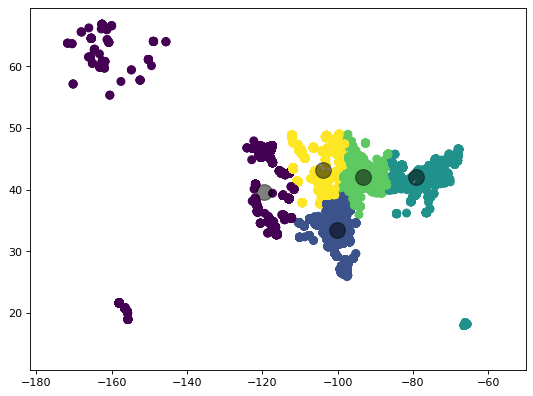

In [38]:
#Plot clusters
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(coordinates[:, 0], coordinates[:, 1], c=kmeans.predict(coordinates), s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.xlim(min(coordinates[:,0]) - 10, -50)
plt.scatter(
    centers[:, 0],
    centers[:, 1],
    c='black',
    s=200,
    alpha=0.5
);